# Visualization

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

In [2]:
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
df_viz = pd.read_csv('C:\\Users\\HP\\Music\\LHLDataCourse\\LHL_final_project\\diabetes_r.csv')
df_viz['Diabetes'] = df_viz['Diabetes_binary']
df_viz.drop(columns=['Diabetes_binary'], inplace=True)
df_viz.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0,0.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0,0.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0,0.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0,0.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0,0.0


In [4]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   CholCheck             70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  AnyHealthcare         70692 non-null  float64
 12  NoDocbcCost           70692 non-null  float64
 13  GenHlth               70692 non-null  float64
 14  MentHlth              70692 non-null  float64
 15  PhysHlth           

## Re-categorizing Data

>The data is set up with all categorical data converted to a float64 value.  E.g, 0=Male and 1 = Female.  

This is done for all variables that would typically be categorical type data. This makes up most of the data set; for visualizion, I will recode the parameters to categorical data.

In [5]:
# Transform data into a categorical type
df_viz['Diabetes'] = df_viz['Diabetes'].replace([0, 1], ['No Diabetes',
                                                                 'Diabetes'])
df_viz['HighBP'] = df_viz['HighBP'].replace([0, 1], ['No High',
                                                     'High BP'])
df_viz['HighChol'] = df_viz['HighChol'].replace([0, 1], ['No High Cholesterol',
                                                         'High Cholesterol'])
df_viz['CholCheck'] = df_viz['CholCheck'].replace([0, 1], ['No Cholesterol Check in 5 Years',
                                                           'Cholesterol Check in 5 Years'])
df_viz['BMI'] = df_viz['BMI'].astype('int32')

df_viz['Smoker'] = df_viz['Smoker'].replace([0, 1], ['No',
                                                     'Yes'])
df_viz['Stroke'] = df_viz['Stroke'].replace([0, 1], ['No',
                                                     'Yes'])
df_viz['HeartDiseaseorAttack'] = df_viz['HeartDiseaseorAttack'].replace([0, 1], ['No',
                                                                                 'Yes'])
df_viz['PhysActivity'] = df_viz['PhysActivity'].replace([0, 1], ['No',
                                                                 'Yes'])
df_viz['Fruits'] = df_viz['Fruits'].replace([0, 1], ['No',
                                                     'Yes'])
df_viz['Veggies'] = df_viz['Veggies'].replace([0, 1], ['No',
                                                       'Yes'])
df_viz['HvyAlcoholConsump'] = df_viz['HvyAlcoholConsump'].replace([0, 1], ['No',
                                                                           'Yes'])
df_viz['AnyHealthcare'] = df_viz['AnyHealthcare'].replace([0, 1], ['No',
                                                                   'Yes'])
df_viz['NoDocbcCost'] = df_viz['NoDocbcCost'].replace([0, 1], ['No',
                                                               'Yes'])
df_viz['GenHlth'] = df_viz['GenHlth'].replace([1, 2, 3, 4, 5],
                                              ['Excellent',
                                               'Very Good',
                                               'Good',
                                               'Fair',
                                               'Poor'])
df_viz['DiffWalk'] = df_viz['DiffWalk'].replace([0, 1], ['No',
                                                         'Yes'])
df_viz['Sex'] = df_viz['Sex'].replace([0, 1], ['Female',
                                               'Male'])
df_viz['Education'] = df_viz['Education'].replace([1, 2, 3, 4, 5, 6],
                                                  ['Never Attended School',
                                                   'Elementary',
                                                   'Some High School',
                                                   'High School Graduate',
                                                   'Some College',
                                                   'College Graduate'])
df_viz['Age'] = df_viz['Age'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                                      ['18-24', '25-29', '30-34',
                                       '35-39', '40-44', '45-49',
                                       '50-54', '55-59', '60-64',
                                       '65-69', '70-74', '75-79', '80+'])
df_viz['Income'] = df_viz['Income'].replace([1, 2, 3, 4, 5, 6, 7, 8],
                                                  ['Less Than $10,000',
                                                   'Less Than $15,000',
                                                   'Less Than $20,000',
                                                   'Less Than $25,000',
                                                   'Less Than $35,000',
                                                   'Less Than $50,000',
                                                   'Less Than $75,000',
                                                   '$75,000 or More'])

df_viz.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,High BP,No High Cholesterol,Cholesterol Check in 5 Years,26,No,No,No,Yes,No,Yes,No,Yes,No,Good,5.0,30.0,No,Male,35-39,College Graduate,"$75,000 or More",No Diabetes
1,High BP,High Cholesterol,Cholesterol Check in 5 Years,26,Yes,Yes,No,No,Yes,No,No,Yes,No,Good,0.0,0.0,No,Male,75-79,College Graduate,"$75,000 or More",No Diabetes
2,No High,No High Cholesterol,Cholesterol Check in 5 Years,26,No,No,No,Yes,Yes,Yes,No,Yes,No,Excellent,0.0,10.0,No,Male,80+,College Graduate,"$75,000 or More",No Diabetes
3,High BP,High Cholesterol,Cholesterol Check in 5 Years,28,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Good,0.0,3.0,No,Male,70-74,College Graduate,"$75,000 or More",No Diabetes
4,No High,No High Cholesterol,Cholesterol Check in 5 Years,29,Yes,No,No,Yes,Yes,Yes,No,Yes,No,Very Good,0.0,0.0,No,Female,55-59,Some College,"$75,000 or More",No Diabetes


## Nulls & Duplicates

In [6]:
df_viz.isnull().sum().sum()

0

In [7]:
# Checking duplicate rows

duplicates = df_viz[df_viz.duplicated()]
print("Duplicate Rows : ",len(duplicates))

Duplicate Rows :  1635


In [8]:
# removing duplicate rows
df_viz.drop_duplicates(inplace = True)
print("Shape after dropping duplicates: ",df_viz.shape)

Shape after dropping duplicates:  (69057, 22)


## Distribution of diabetes occurence by independent variables

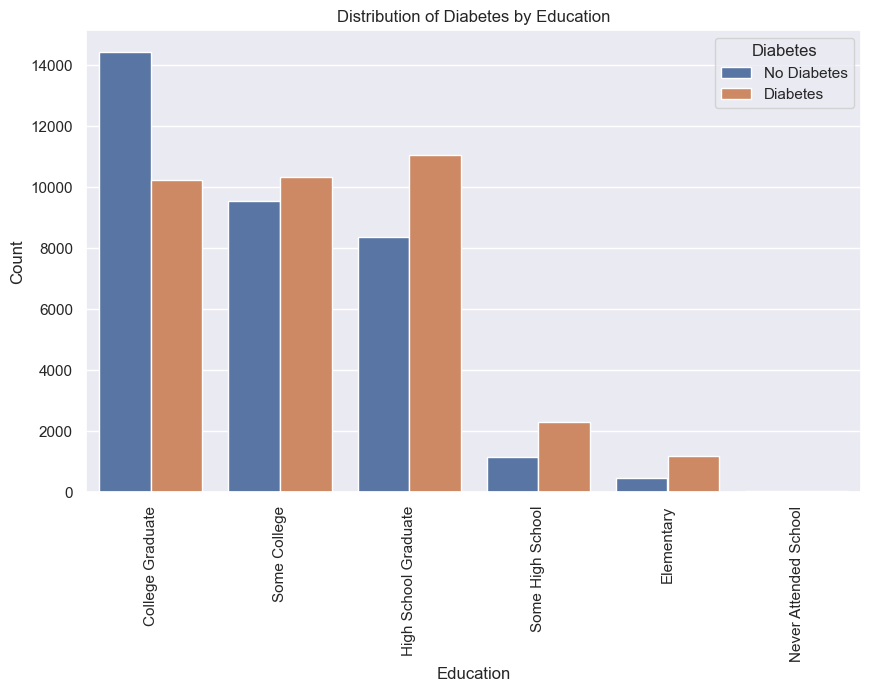

In [11]:
# distribution of diabetes by education
plt.figure(figsize=(10, 6))
sns.countplot(data=df_viz, x='Education', hue='Diabetes')
plt.title('Distribution of Diabetes by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

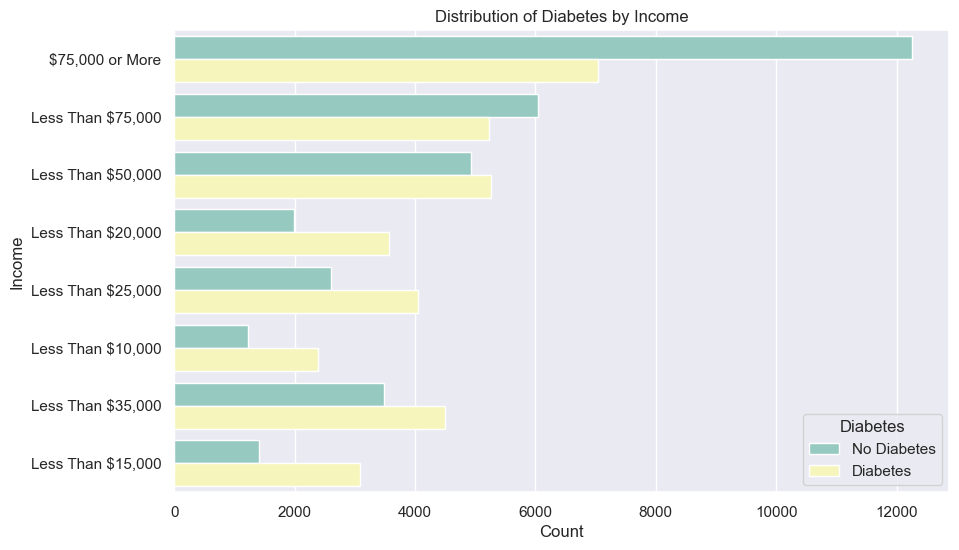

In [13]:
# distribution of diabetes by income
plt.figure(figsize=(10, 6))
sns.countplot(data=df_viz, y='Income', hue='Diabetes', palette='Set3')
plt.title('Distribution of Diabetes by Income')
plt.xlabel('Count')
plt.ylabel('Income')
plt.show()

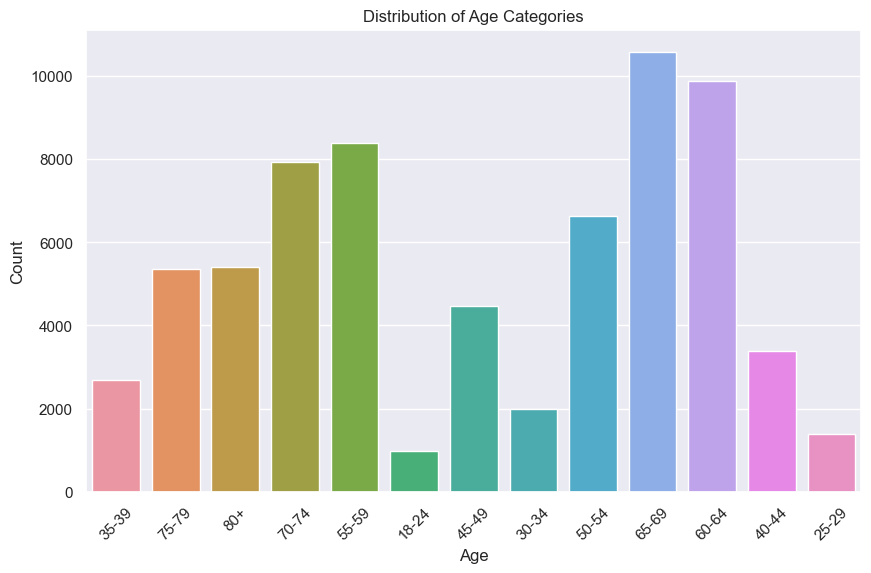

In [20]:
# distribution of Age
plt.figure(figsize=(10, 6))
sns.countplot(data=df_viz, x='Age')
plt.title('Distribution of Age Categories')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

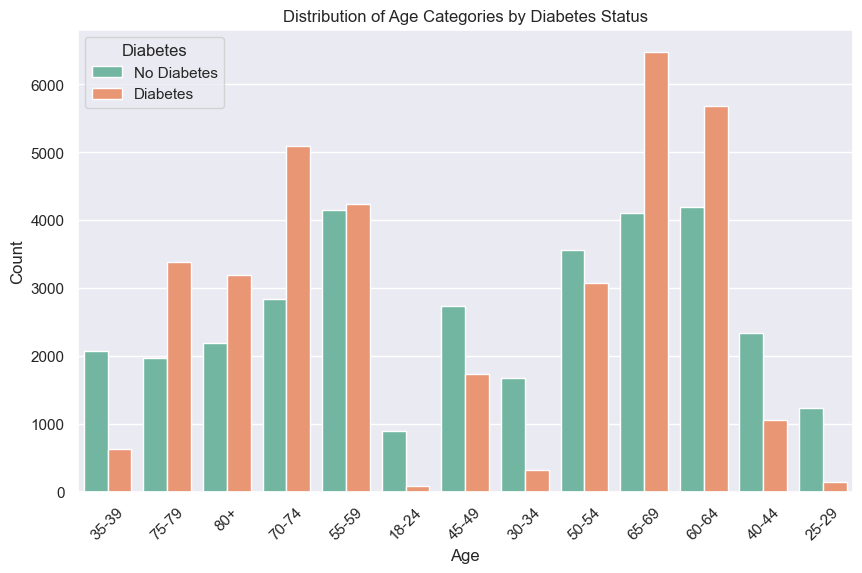

In [21]:
# distribution of diabetes by Age
plt.figure(figsize=(10, 6))
sns.countplot(data=df_viz, x='Age', hue='Diabetes', palette='Set2')
plt.title('Distribution of Age Categories by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

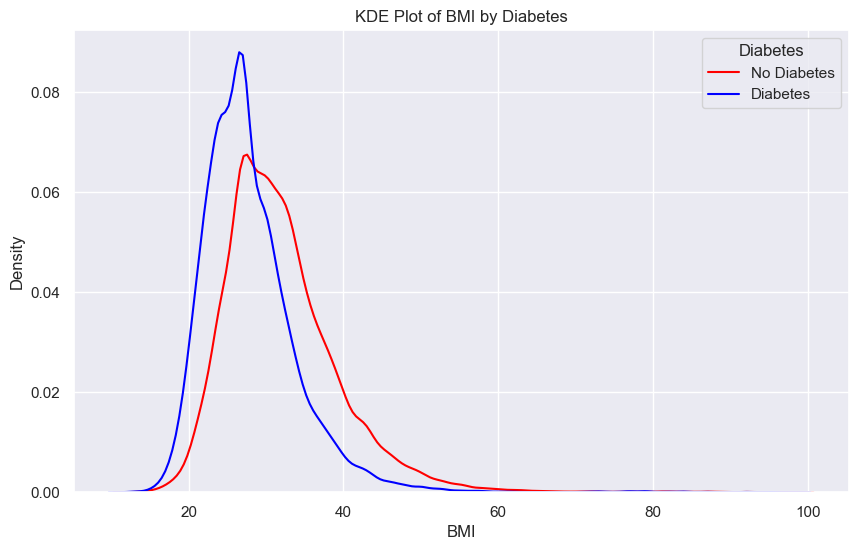

In [27]:
# diabetes distrubtion by BMI
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_viz, x='BMI', hue='Diabetes', common_norm=False, palette=['blue', 'red'])
plt.title('KDE Plot of BMI by Diabetes')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()

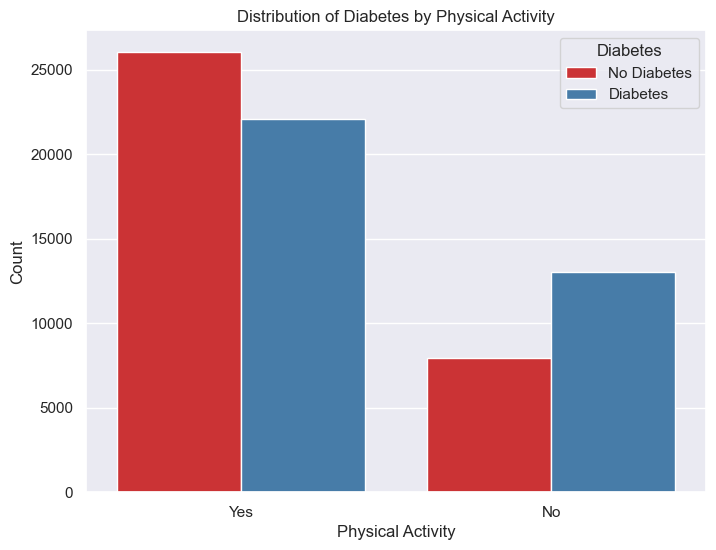

In [32]:
# by physical activity
plt.figure(figsize=(8, 6))
sns.countplot(data=df_viz, x='PhysActivity', hue='Diabetes', palette= 'Set1')
plt.title('Distribution of Diabetes by Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()


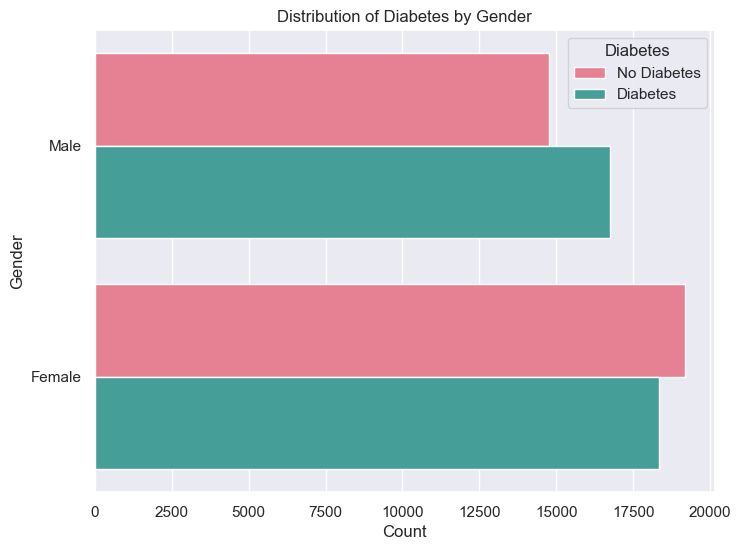

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_viz, y='Sex', hue='Diabetes', palette='husl')
plt.title('Distribution of Diabetes by Gender')
plt.ylabel('Gender')
plt.xlabel('Count')
plt.show()

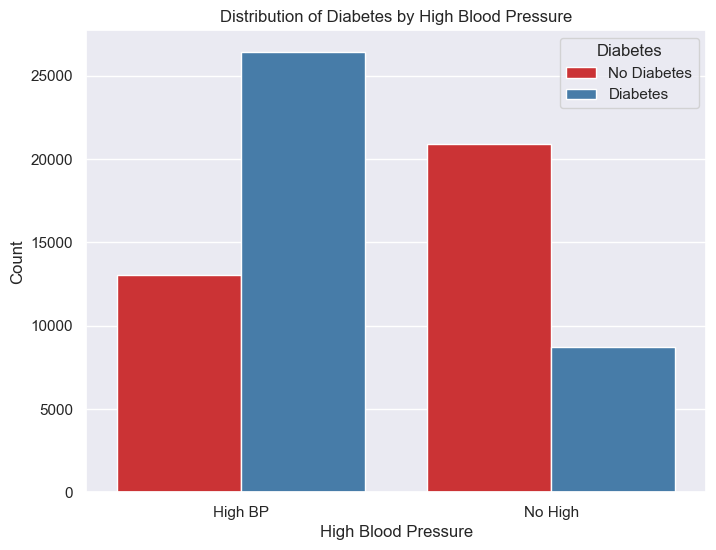

In [40]:
# by high blood pressure
plt.figure(figsize=(8, 6))
sns.countplot(data=df_viz, x='HighBP', hue='Diabetes', palette='Set1')
plt.title('Distribution of Diabetes by High Blood Pressure')
plt.xlabel('High Blood Pressure')
plt.ylabel('Count')
plt.show()

In [28]:
# To CSV

df_viz.to_csv('diabetes_viz.csv', index=False)